# Uninsured and Unemployed Estimates for Househould Pulse Survey Weeks 20 and 21
We utilize the Census Bureau's Household Pulse Survey to understand the characteristics of those who are uninsured and recieving unemployment benefits. We use HPS-provided person weights to generate our estimates, which are created using number of people per surveyed household, population controls based on state demographics, and a raking procedure further defined in each week's technical documentation.
- Week 20 is from November 25, 2020 through December 7, 2020, and had 72,484 respondents.
- Week 21 is from December 9, 2020 through December 21, 2020, and had 69,944 respondents.

Pie charts are stacked vertically or horizontally depending on group label sizes.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
survey = pd.read_csv("pulse2020_puf_20.csv")
uninsured = survey[(survey['PRIVHLTH'] == 2) & (survey['PUBHLTH'] == 2)] # households with neither public nor private health insurance
uninsur_rcv = uninsured[(uninsured['SPNDSRC5'] == 1)] # uninsured AND recieved unemployment in last 7 days

survey2 = pd.read_csv("pulse2020_puf_21.csv")
uninsured2 = survey2[(survey2['PRIVHLTH'] == 2) & (survey2['PUBHLTH'] == 2)] # households with neither public nor private health insurance
uninsur_rcv2 = uninsured2[(uninsured2['SPNDSRC5'] == 1)] # uninsured AND recieved unemployment in last 7 days

## Racial Composition
About half of those uninsured and unemployed are persons of color. 

In [99]:
# Race totals for uninsured and recieving unemployment benefits
# Week 20 estimates
uninsur_rcv_race = pd.DataFrame(columns = ['Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Non-Hispanic Other'])
uninsur_rcv_race.loc[0,['Hispanic']] = uninsur_rcv[uninsur_rcv['RHISPANIC'] == 2]['PWEIGHT'].sum()
uninsur_rcv_race['Non-Hispanic White'] = uninsur_rcv[(uninsur_rcv['RRACE'] == 1)&(uninsur_rcv['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race['Non-Hispanic Black'] = uninsur_rcv[(uninsur_rcv['RRACE'] == 2)&(uninsur_rcv['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race['Non-Hispanic Asian'] = uninsur_rcv[(uninsur_rcv['RRACE'] == 3)&(uninsur_rcv['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race['Non-Hispanic Other'] = uninsur_rcv[(uninsur_rcv['RRACE'] == 4)&(uninsur_rcv['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race['Week'] = 20

# Week 21 estimates
uninsur_rcv_race2 = pd.DataFrame(columns = ['Hispanic', 'Non-Hispanic White', 'Non-Hispanic Black', 'Non-Hispanic Asian', 'Non-Hispanic Other'])
uninsur_rcv_race2.loc[0,['Hispanic']] = uninsur_rcv2[uninsur_rcv2['RHISPANIC'] == 2]['PWEIGHT'].sum()
uninsur_rcv_race2['Non-Hispanic White'] = uninsur_rcv2[(uninsur_rcv2['RRACE'] == 1)&(uninsur_rcv2['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race2['Non-Hispanic Black'] = uninsur_rcv2[(uninsur_rcv2['RRACE'] == 2)&(uninsur_rcv2['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race2['Non-Hispanic Asian'] = uninsur_rcv2[(uninsur_rcv2['RRACE'] == 3)&(uninsur_rcv2['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race2['Non-Hispanic Other'] = uninsur_rcv2[(uninsur_rcv2['RRACE'] == 4)&(uninsur_rcv2['RHISPANIC'] == 1)]['PWEIGHT'].sum()
uninsur_rcv_race2['Week'] = 21

uninsur_rcv_race.append(uninsur_rcv_race2).set_index('Week')


,Hispanic,Non-Hispanic White,Non-Hispanic Black,Non-Hispanic Asian,Non-Hispanic Other
Week,,,,,
20,998582,2.390489e+06,661957.674522,257312.455208,180102.818486
21,1.07157e+06,2.070416e+06,729999.634675,137254.721453,220480.835907


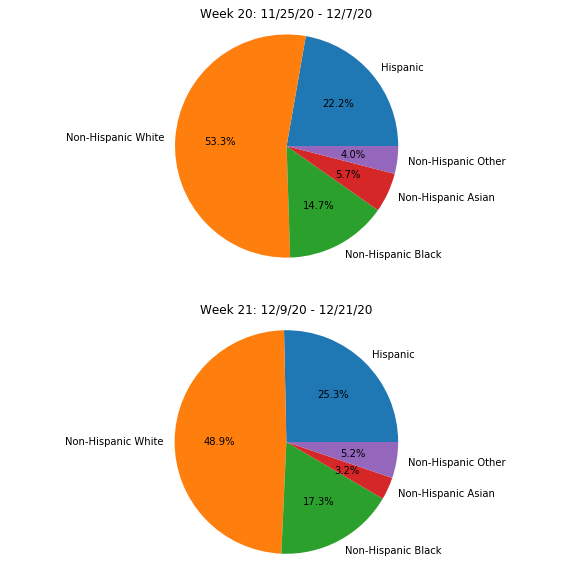

In [100]:
# Generate pie charts for estimates
uninsur_rcv_race = uninsur_rcv_race.drop(columns = 'Week')
uninsur_rcv_race2 = uninsur_rcv_race2.drop(columns = 'Week')

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.pie(uninsur_rcv_race.iloc[0], labels = uninsur_rcv_race.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')
ax1.axis('equal')

ax2.pie(uninsur_rcv_race2.iloc[0], labels = uninsur_rcv_race2.columns, autopct='%1.1f%%')
ax2.axis('equal')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()


## Gender Composition
The gender composition of those uninsured and on unemployment is approximately balanced.

In [101]:
# Store gender totals
uninsur_rcv_gender = pd.DataFrame(columns = ['Male', 'Female', 'Week'])
uninsur_rcv_gender.loc[0,['Male']] = uninsur_rcv[uninsur_rcv['EGENDER'] == 1]['PWEIGHT'].sum()
uninsur_rcv_gender.loc[0,['Female']] = uninsur_rcv[uninsur_rcv['EGENDER'] == 2]['PWEIGHT'].sum()
uninsur_rcv_gender.loc[0,['Week']] = 20
uninsur_rcv_gender.loc[1,['Male']] = uninsur_rcv2[uninsur_rcv2['EGENDER'] == 1]['PWEIGHT'].sum()
uninsur_rcv_gender.loc[1,['Female']] = uninsur_rcv2[uninsur_rcv2['EGENDER'] == 2]['PWEIGHT'].sum()
uninsur_rcv_gender.loc[1,['Week']] = 21

uninsur_rcv_gender.set_index('Week')

,Male,Female
Week,,
20,2.24352e+06,2.24492e+06
21,2.38542e+06,1.8443e+06


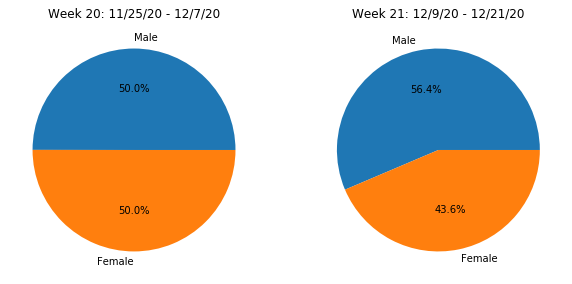

In [102]:
uninsur_rcv_gender = uninsur_rcv_gender.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(uninsur_rcv_gender.iloc[0], labels = uninsur_rcv_gender.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(uninsur_rcv_gender.iloc[1], labels = uninsur_rcv_gender.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()

## Education Attainment Composition
About two thirds of those uninsured and on unemployment have had up to some college education.

In [130]:
up_to_hs = [1, 2, 3]
some_college = [4]
college_degree = [5, 6, 7] # associate's, bachelor's, grad

education_levels = pd.DataFrame(columns = ['Up to High School', 'Some College', 'College/Associates/Masters','Week'])
education_levels.loc[0,['Up to High School']] = uninsur_rcv[uninsur_rcv['EEDUC'].isin(up_to_hs)]['PWEIGHT'].sum()
education_levels.loc[0,['Some College']] = uninsur_rcv[uninsur_rcv['EEDUC'].isin(some_college)]['PWEIGHT'].sum()
education_levels.loc[0,['College/Associates/Masters']] = uninsur_rcv[uninsur_rcv['EEDUC'].isin(college_degree)]['PWEIGHT'].sum()
education_levels.loc[0,['Week']] = 20

education_levels.loc[1,['Up to High School']] = uninsur_rcv2[uninsur_rcv2['EEDUC'].isin(up_to_hs)]['PWEIGHT'].sum()
education_levels.loc[1,['Some College']] = uninsur_rcv2[uninsur_rcv2['EEDUC'].isin(some_college)]['PWEIGHT'].sum()
education_levels.loc[1,['College/Associates/Masters']] = uninsur_rcv2[uninsur_rcv2['EEDUC'].isin(college_degree)]['PWEIGHT'].sum()
education_levels.loc[1,['Week']] = 21

education_levels.set_index('Week')

,Up to High School,Some College,College/Associates/Masters
Week,,,
20,2.31917e+06,1.14331e+06,1.02596e+06
21,2.1803e+06,1.01529e+06,1.03413e+06


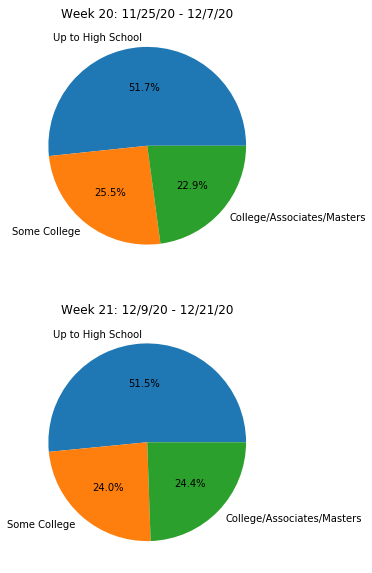

In [131]:
education_levels = education_levels.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
ax1.pie(education_levels.iloc[0], labels = education_levels.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(education_levels.iloc[1], labels = education_levels.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()

## Persons Providing for Children
Each week, it's estimated that over 1.5 million of uninsured adults on unemployment have at least one child (under 18 years old). 

In [140]:
children = pd.DataFrame(columns = ['With 1+ Kid','Without Kids','Week'])
children.loc[0,['With 1+ Kid']] = uninsur_rcv[uninsur_rcv['THHLD_NUMKID'] >= 1]['PWEIGHT'].sum()
children.loc[0,['Without Kids']] = uninsur_rcv[uninsur_rcv['THHLD_NUMKID'] == 0]['PWEIGHT'].sum()
children.loc[0,['Week']] = 20
children.loc[1,['With 1+ Kid']] = uninsur_rcv2[uninsur_rcv2['THHLD_NUMKID'] >= 1]['PWEIGHT'].sum()
children.loc[1,['Without Kids']] = uninsur_rcv2[uninsur_rcv2['THHLD_NUMKID'] == 0]['PWEIGHT'].sum()
children.loc[1,['Week']] = 21
children.set_index('Week')

,With 1+ Kid,Without Kids
Week,,
20,1.85298e+06,2.63546e+06
21,1.52062e+06,2.7091e+06


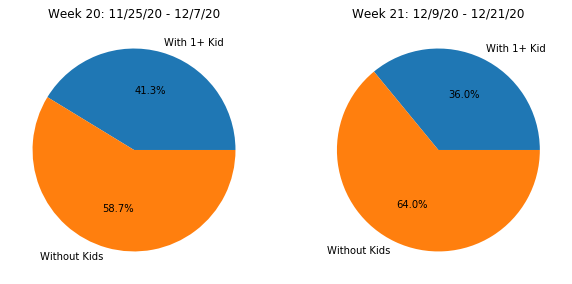

In [141]:
children = children.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(children.iloc[0], labels = children.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(children.iloc[1], labels = children.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()

## Food Security
Almost a third of those uninsured and on unemployment are food insecure.

In [136]:
# How much FOOD?
enough_food_idx = [1, 2] # Enough of foods desired or disliked
not_enough_food_idx = [3, 4] # sometimes or often not enough

food_levels = pd.DataFrame(columns = ['Enough Food','Not Enough Food','Week'])
food_levels.loc[0,['Enough Food']] = uninsur_rcv[uninsur_rcv['CURFOODSUF'].isin(enough_food_idx)]['PWEIGHT'].sum()
food_levels.loc[0,['Not Enough Food']] = uninsur_rcv[uninsur_rcv['CURFOODSUF'].isin(not_enough_food_idx)]['PWEIGHT'].sum()
food_levels.loc[0,['Week']] = 20

food_levels.loc[1,['Enough Food']] = uninsur_rcv2[uninsur_rcv2['CURFOODSUF'].isin(enough_food_idx)]['PWEIGHT'].sum()
food_levels.loc[1,['Not Enough Food']] = uninsur_rcv2[uninsur_rcv2['CURFOODSUF'].isin(not_enough_food_idx)]['PWEIGHT'].sum()
food_levels.loc[1,['Week']] = 21

food_levels.set_index('Week')

,Enough Food,Not Enough Food
Week,,
20,2.94465e+06,1.53939e+06
21,2.94483e+06,1.28488e+06


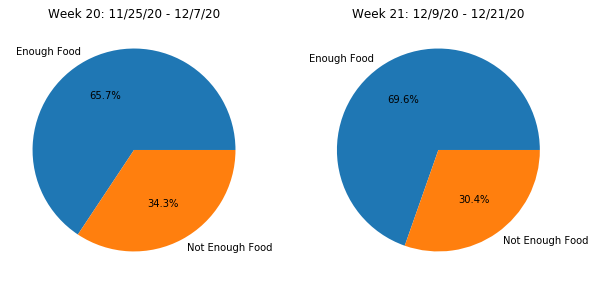

In [137]:
food_levels = food_levels.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(food_levels.iloc[0], labels = food_levels.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(food_levels.iloc[1], labels = food_levels.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()

## Confidence in Next Mortgage Payment
More than half of those uninsured and on unemployment have none to slight confidence in their ability to pay their next mortgage payment.

In [134]:
# Confidence in next mortgage payment
# Confidence variable only available for mortgage payments (not rent)

conf = [3, 4] # Moderate to high confidence
no_conf = [1,2] # None to slight confidence

payment_confidence = pd.DataFrame(columns = ['None to Slight','Moderate to High','Week'])
payment_confidence.loc[0,['None to Slight']] = uninsur_rcv[uninsur_rcv['MORTCONF'].isin(conf)]['PWEIGHT'].sum()
payment_confidence.loc[0,['Moderate to High']] = uninsur_rcv[uninsur_rcv['MORTCONF'].isin(no_conf)]['PWEIGHT'].sum()
payment_confidence.loc[0,['Week']] = 20

payment_confidence.loc[1,['None to Slight']] = uninsur_rcv2[uninsur_rcv2['MORTCONF'].isin(conf)]['PWEIGHT'].sum()
payment_confidence.loc[1,['Moderate to High']] = uninsur_rcv2[uninsur_rcv2['MORTCONF'].isin(no_conf)]['PWEIGHT'].sum()
payment_confidence.loc[1,['Week']] = 21

payment_confidence.set_index('Week')

,None to Slight,Moderate to High
Week,,
20,1.96739e+06,1.5316e+06
21,1.70088e+06,1.68897e+06


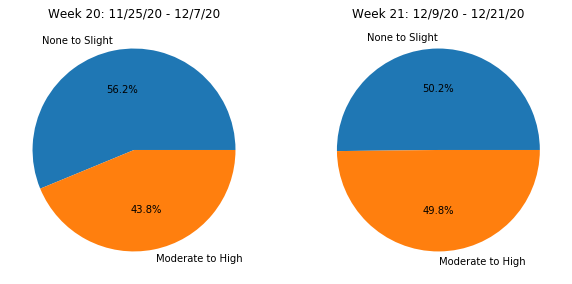

In [138]:
payment_confidence = payment_confidence.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(payment_confidence.iloc[0], labels = payment_confidence.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(payment_confidence.iloc[1], labels = payment_confidence.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()

## Late on Rent or Mortgage Payment
In weeks 20 and 21, it's estimated that around 1 million people who are uninsured and on unemployment are late on housing payments.

In [143]:
late = pd.DataFrame(columns=['Late','Caught Up','Week'])
late.loc[0,['Late']] = uninsur_rcv[uninsur_rcv['RENTCUR'] == 2]['PWEIGHT'].sum() + uninsur_rcv[uninsur_rcv['MORTCUR'] == 2]['PWEIGHT'].sum()
late.loc[0,['Caught Up']] = uninsur_rcv[uninsur_rcv['RENTCUR'] == 1]['PWEIGHT'].sum() + uninsur_rcv[uninsur_rcv['MORTCUR'] == 1]['PWEIGHT'].sum()
late.loc[0,['Week']] = 20

late.loc[1,['Late']] = uninsur_rcv2[uninsur_rcv2['RENTCUR'] == 2]['PWEIGHT'].sum() + uninsur_rcv2[uninsur_rcv2['MORTCUR'] == 2]['PWEIGHT'].sum()
late.loc[1,['Caught Up']] = uninsur_rcv2[uninsur_rcv2['RENTCUR'] == 1]['PWEIGHT'].sum() + uninsur_rcv2[uninsur_rcv2['MORTCUR'] == 1]['PWEIGHT'].sum()
late.loc[1,['Week']] = 21

late.set_index('Week')

,Late,Caught Up
Week,,
20,1.00206e+06,2.64426e+06
21,1.17088e+06,2.28142e+06


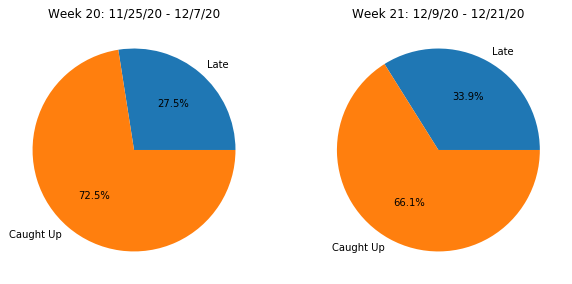

In [144]:
late = late.drop(columns=['Week'])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(late.iloc[0], labels = late.columns, autopct='%1.1f%%')
ax1.title.set_text('Week 20: 11/25/20 - 12/7/20')

ax2.pie(late.iloc[1], labels = late.columns, autopct='%1.1f%%')
ax2.title.set_text('Week 21: 12/9/20 - 12/21/20')
plt.show()